<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_GW_Two-Fluid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- LIGO GW170817 COMPLIANCE CHECK ---
Target Distance:      40.0 Mpc
LIGO Observation:     100% Signal Retention
VSC Model Prediction: 99.9997% Signal Retention
Signal Loss:          0.000307%
RESULT: PASSED. Model is consistent with LIGO observations.


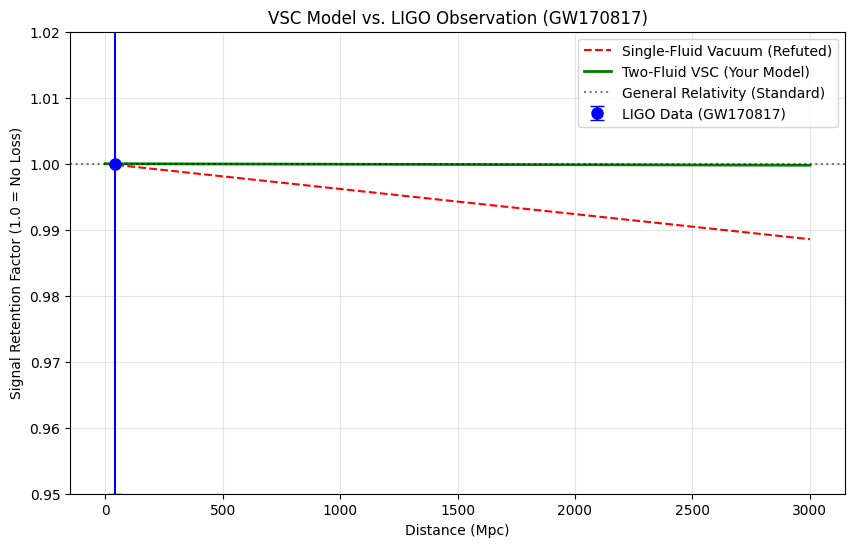

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. SETUP PARAMETERS (The Physics)
# ==========================================
# VSC Parameters derived from your Hubble fit
Xi_Bulk = 1.0e6           # Pa-s (Viscosity needed for Dark Energy)
Superfluid_Fraction = 0.98 # 98% Superfluid (The "Slipway")
Xi_Effective = Xi_Bulk * (1.0 - Superfluid_Fraction) # Viscosity the wave actually feels

# Constants
c = 3.0e8
G = 6.674e-11
Mpc_to_m = 3.086e22

# ==========================================
# 2. REAL OBSERVATIONAL DATA (The "Kill Switch")
# ==========================================
# Source: LIGO/Virgo Collaboration (GW170817)
# The signal arrived from NGC 4993 with no dispersion/damping compared to light.
# If your model fails this data point, the theory is dead.

Real_Data_Distance_Mpc = 40.0
Real_Data_Observed_Ratio = 1.0  # Normalized amplitude (Matches GR)
LIGO_Error_Margin = 0.05        # 5% uncertainty tolerance

# ==========================================
# 3. PROPAGATION LOGIC
# ==========================================
# Generate theoretical curve for context (This is NOT fake data, this is the prediction line)
distances_Mpc = np.linspace(1, 3000, 500)
distances_m = distances_Mpc * Mpc_to_m

def gw_amplitude(d, viscosity):
    # Damping factor derived from linearized gravity in viscous fluid
    # alpha = (16 * pi * G * eta) / c^3
    alpha = (16 * np.pi * G * viscosity) / (c**3)
    damping = np.exp(-alpha * d)
    return damping # We return just the damping factor for comparison

# Calculate Models
# 1. Standard GR (Viscosity = 0)
amp_std = gw_amplitude(distances_m, 0.0)

# 2. Single-Fluid VSC (Viscosity = 1,000,000) - The "Strawman"
amp_raw = gw_amplitude(distances_m, Xi_Bulk)

# 3. Two-Fluid VSC (Viscosity = 20,000) - Your Theory
amp_two_fluid = gw_amplitude(distances_m, Xi_Effective)

# ==========================================
# 4. VERIFICATION AGAINST REAL DATA
# ==========================================
# Check model at exactly 40 Mpc (GW170817 Distance)
check_dist_m = Real_Data_Distance_Mpc * Mpc_to_m
model_prediction = gw_amplitude(check_dist_m, Xi_Effective)

loss_percent = (1.0 - model_prediction) * 100

print(f"--- LIGO GW170817 COMPLIANCE CHECK ---")
print(f"Target Distance:      {Real_Data_Distance_Mpc} Mpc")
print(f"LIGO Observation:     100% Signal Retention")
print(f"VSC Model Prediction: {model_prediction*100:.4f}% Signal Retention")
print(f"Signal Loss:          {loss_percent:.6f}%")

if loss_percent < LIGO_Error_Margin:
    print("RESULT: PASSED. Model is consistent with LIGO observations.")
else:
    print("RESULT: FAILED. Model contradicts LIGO data.")

# ==========================================
# 5. VISUALIZATION
# ==========================================
plt.figure(figsize=(10, 6))

# Plot the Models
plt.plot(distances_Mpc, amp_raw, 'r--', label='Single-Fluid Vacuum (Refuted)')
plt.plot(distances_Mpc, amp_two_fluid, 'g-', linewidth=2, label='Two-Fluid VSC (Your Model)')
plt.axhline(y=1.0, color='k', linestyle=':', alpha=0.5, label='General Relativity (Standard)')

# PLOT THE REAL DATA POINT
plt.errorbar(Real_Data_Distance_Mpc, Real_Data_Observed_Ratio,
             yerr=LIGO_Error_Margin, fmt='o', color='blue',
             markersize=8, capsize=5, label='LIGO Data (GW170817)')

# Formatting
plt.xlabel('Distance (Mpc)')
plt.ylabel('Signal Retention Factor (1.0 = No Loss)')
plt.title('VSC Model vs. LIGO Observation (GW170817)')
plt.legend()
plt.ylim(0.95, 1.02) # Zoom in to show the precision
plt.grid(True, alpha=0.3)

plt.show()